In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV

print("Packages installed")

#settings
pd.set_option('display.max_row', 100)
pd.set_option('display.max_columns', 1200)
pd.set_option('display.width', 1200)

Packages installed


In [4]:
df_limpio = pd.read_csv('C:/Users/puent/OneDrive/Escritorio/Javi Bootcamp/Data-Science-TBB-main/SCRIPTS/Proyectos/Machine Learning/src/data/processed/dfLimpio.csv')


In [5]:
df_limpio

,tourney_id,surface,draw_size,tourney_level,match_num,winner_id,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_hand,loser_ht,loser_ioc,loser_age,best_of,round,winner_rank,winner_rank_points,loser_rank,loser_rank_points,tourney_year,tourney_month,tourney_day
0,0,2,64,2021,237,126207,1,188.0,57,23.4,126952,1,180.0,37,23.6,3,6,53.0,1228.0,71.0,996.0,0,7,24
1,0,2,64,2021,238,105526,1,193.0,27,31.2,106329,0,183.0,8,27.1,3,6,48.0,1410.0,95.0,829.0,0,7,24
2,0,2,64,2021,239,111576,1,178.0,30,23.9,104797,1,188.0,64,34.8,3,6,160.0,471.0,197.0,354.0,0,7,24
3,0,2,64,2021,240,105357,1,183.0,1,32.0,207518,1,185.0,34,19.3,3,6,44.0,1476.0,61.0,1106.0,0,7,24
4,0,2,64,2021,241,207830,1,183.0,16,20.7,105311,1,185.0,48,32.3,3,6,145.0,525.0,137.0,570.0,0,7,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7848,357,2,4,2023,4,208029,1,185.0,17,19.7,111576,1,178.0,31,25.4,3,7,9.0,3046.0,506.0,70.0,1,2,3
7849,358,2,4,2023,2,111576,1,178.0,30,26.0,125842,1,191.0,54,28.3,3,7,156.0,397.0,779.0,29.0,1,9,16
7850,359,0,4,2023,2,200031,1,185.0,38,27.0,105877,1,185.0,19,31.7,3,7,452.0,97.0,185.0,326.0,1,9,15
7851,360,0,4,2023,1,105633,1,183.0,20,32.9,202378,1,178.0,0,24.1,3,7,463.0,93.0,828.0,24.0,1,9,16


In [6]:
#Comprobamos la limpieza del df
df_limpio.isnull().count()

tourney_id            7853
surface               7853
draw_size             7853
tourney_level         7853
match_num             7853
winner_id             7853
winner_hand           7853
winner_ht             7853
winner_ioc            7853
winner_age            7853
loser_id              7853
loser_hand            7853
loser_ht              7853
loser_ioc             7853
loser_age             7853
best_of               7853
round                 7853
winner_rank           7853
winner_rank_points    7853
loser_rank            7853
loser_rank_points     7853
tourney_year          7853
tourney_month         7853
tourney_day           7853
dtype: int64

In [7]:
df_limpio.shape

(7853, 24)

## Regresion Logística --> Predice el ganador

In [8]:

# Paso 1: Preparación de los datos
X = df_limpio.drop(columns='winner_id')
y = df_limpio['winner_id']

# Paso 2: División de los datos  y escalar las características
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Paso 3: Entrenar el modelo con los datos escalados
model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, y_train)

# Paso 4: Evaluar el modelo
y_pred = model.predict(X_test_scaled)
LogisticRegression_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", LogisticRegression_accuracy)


Accuracy: 0.7243793761935073


In [9]:
# Comparación de los resultados
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df)

      Actual  Predicted
5683  111460     111460
5039  111513     111513
6888  208029     207989
4886  125802     125802
2388  104871     104871
...      ...        ...
4461  105430     105575
3961  104468     104468
415   105138     105138
4825  122330     122330
7077  127339     111797

[1571 rows x 2 columns]


## Random Forest Classifier--> Predice el ganador

In [10]:
# Entrenamiento del modelo
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Evaluación del modelo
y_pred_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy Random Forest:", accuracy_rf)

Accuracy Random Forest: 0.9522597071928708


In [11]:
# Comparación de los resultados
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df)

      Actual  Predicted
5683  111460     111460
5039  111513     111513
6888  208029     207989
4886  125802     125802
2388  104871     104871
...      ...        ...
4461  105430     105575
3961  104468     104468
415   105138     105138
4825  122330     122330
7077  127339     111797

[1571 rows x 2 columns]


In [12]:
#Pillamos features importances
importancias = model_rf.feature_importances_
nombres_caracteristicas = X.columns

In [13]:
importancias

array([0.04195867, 0.01095947, 0.00923259, 0.01645461, 0.0248939 ,
       0.02271812, 0.14614484, 0.16376749, 0.1528904 , 0.02326305,
       0.00368967, 0.01878178, 0.02109864, 0.0237776 , 0.00271051,
       0.00963725, 0.0997632 , 0.10145885, 0.02527723, 0.02529678,
       0.00685472, 0.02471511, 0.02465553])

In [14]:
nombres_caracteristicas

Index(['tourney_id', 'surface', 'draw_size', 'tourney_level', 'match_num', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age', 'loser_id', 'loser_hand', 'loser_ht', 'loser_ioc', 'loser_age', 'best_of', 'round', 'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points', 'tourney_year', 'tourney_month', 'tourney_day'], dtype='object')

In [15]:
len(importancias)

23

In [16]:
len(nombres_caracteristicas)

23

In [17]:

df_importancias = pd.DataFrame({'Feature': nombres_caracteristicas, 'Importance': importancias})
df_importancias


,Feature,Importance
0,tourney_id,0.041959
1,surface,0.010959
2,draw_size,0.009233
3,tourney_level,0.016455
4,match_num,0.024894
5,winner_hand,0.022718
6,winner_ht,0.146145
7,winner_ioc,0.163767
8,winner_age,0.152890
9,loser_id,0.023263


### Creo que hay overfitting, asi que modifico los hiperparámetros

In [18]:
"""

# Paso 1: Realizar una búsqueda de hiperparámetros utilizando validación cruzada
param_grid = {
    'n_estimators': [10, 25, 50],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=4, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Paso 2: Entrenar el modelo con los mejores hiperparámetros encontrados
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

# Paso 3: Evaluar el modelo en el conjunto de prueba
y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
"""


'\n\n# Paso 1: Realizar una búsqueda de hiperparámetros utilizando validación cruzada\nparam_grid = {\n    \'n_estimators\': [10, 25, 50],\n    \'max_depth\': [None, 5, 10],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4]\n}\n\ngrid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=4, n_jobs=-1)\ngrid_search.fit(X_train, y_train)\n\n# Paso 2: Entrenar el modelo con los mejores hiperparámetros encontrados\nbest_rf_model = grid_search.best_estimator_\nbest_rf_model.fit(X_train, y_train)\n\n# Paso 3: Evaluar el modelo en el conjunto de prueba\ny_pred = best_rf_model.predict(X_test)\naccuracy = accuracy_score(y_test, y_pred)\nprint("Accuracy:", accuracy)\n'

## Bagging que combina 100 árboles de decisión con validación cruzada --> Predice el ganador

In [19]:
#Separamos en X e Y
caracteristicas = df_limpio.drop(columns='winner_id', axis=1)
target = df_limpio['winner_id']

In [20]:
#Instanciamos los modelos
Arbol_decision = DecisionTreeClassifier(max_depth=5,random_state=42)
Bagging = BaggingClassifier(
    base_estimator = Arbol_decision,
    n_estimators=500, # Cantidad de árboles
    max_samples=100, # Muestras utilizadas en boostrapping
    bootstrap=True, # Usamos boostrapping
    max_features = 3, # Features que utiliza en el boostrapping. Cuanto más bajo, mejor generalizará y menos overfitting
    random_state=42)

In [21]:
#Lo entrenamos
Bagging.fit(caracteristicas, target)
predicciones = Bagging.predict(caracteristicas)
bagging_score = accuracy_score(target, predicciones)

C:\Users\puent\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [22]:
bagging_score

0.5204380491531899

In [23]:
# Creamos un DataFrame para comparar las predicciones con el target
resultados = pd.DataFrame({'Predicciones': predicciones, 'Target': target})
resultados.head(15)

,Predicciones,Target
0,126207,126207
1,100644,105526
2,126774,111576
3,200282,105357
4,134770,207830
5,122330,105062
6,111815,136440
7,200175,200175
8,106218,106218
9,128034,106078


In [24]:
# Realizamos validación cruzada
scores = cross_val_score(Bagging, caracteristicas, target, cv=5)

C:\Users\puent\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\puent\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\puent\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\puent\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\s

In [25]:
# Puntajes de validación cruzada
print("Puntajes de validación cruzada:", scores)

# Calcular y mostrar el promedio de los puntajes
print("Promedio de puntajes de validación cruzada:", scores.mean())

Puntajes de validación cruzada: [0.42584341 0.46403565 0.44875875 0.4388535  0.37834395]
Promedio de puntajes de validación cruzada: 0.43116705250824056


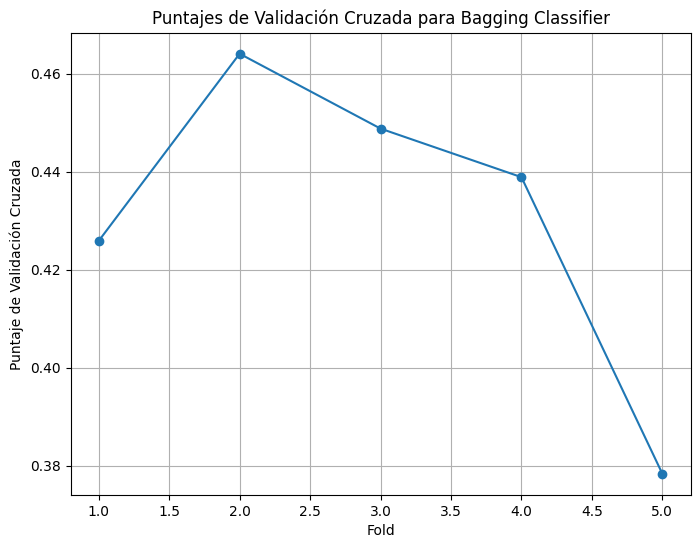

In [26]:
# Figura
plt.figure(figsize=(8, 6))

# Grafica de los puntajes de validación cruzada
plt.plot(range(1, 6), scores, marker='o', linestyle='-')

# Agregamos etiquetas y título
plt.xlabel('Fold')
plt.ylabel('Puntaje de Validación Cruzada')
plt.title('Puntajes de Validación Cruzada para Bagging Classifier')
plt.grid(True)
plt.show()

## Adaboost --> predice el ganador

In [27]:
#Instanciamos el AdaBoost
estimator = DecisionTreeClassifier(max_depth=3)

ada = AdaBoostClassifier(base_estimator = estimator,
                             n_estimators=100,
                             learning_rate=0.5,
                             random_state=42)

In [28]:
#Entrenamos el modelo
ada.fit(caracteristicas, target)
predicciones_3 = ada.predict(caracteristicas)
adaBoost_score = accuracy_score(target, predicciones_3)

C:\Users\puent\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [29]:
adaBoost_score

0.939131542085827

In [30]:
# Creamos un DataFrame para comparar las predicciones con el target
resultados = pd.DataFrame(data={'Predicciones': predicciones_3, 'Target': target})
resultados.head(20)

,Predicciones,Target
0,126207,126207
1,105870,105526
2,111576,111576
3,105357,105357
4,207830,207830
5,105062,105062
6,136440,136440
7,200175,200175
8,106218,106218
9,106078,106078


## XGBoost --> Predice el ganador

In [31]:
# Instancia del modelo XGBoostClassifier
xgb_classifier = XGBClassifier(n_estimators=50)


In [32]:
# Inicializamos el codificador
label_encoder = LabelEncoder()

# Convertimos la variable categórica a valores numéricos discretos
y_encoded = label_encoder.fit_transform(y)

# Entrenamos el modelo con las etiquetas codificadas
xgb_classifier.fit(X, y_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [33]:
# Predecimos
predicciones_2 = xgb_classifier.predict(X)

In [34]:
##Calculamos el accuracy
xgb_accuracy = accuracy_score(y_encoded, predicciones_2)
print("Accuracy:", xgb_accuracy)

Accuracy: 0.9923596077932001


In [35]:
# Creamos un DataFrame para comparar las predicciones con el target
resultados = pd.DataFrame(data={'Predicciones': predicciones_2, 'Target': y_encoded})
resultados.head(20)

,Predicciones,Target
0,182,182
1,53,53
2,148,148
3,41,41
4,270,270
5,32,32
6,212,212
7,228,228
8,111,111
9,99,99


## Resumen final

In [36]:
 ##Creamos un DataFrame con los puntajes y las ordenamos
resultados_finales = pd.DataFrame({'Modelo': ['XGBoost','Regresión logística','Bagging', 'Random Forest', 'AdaBoost'], 'Resultado': [xgb_accuracy,LogisticRegression_accuracy ,bagging_score, accuracy_rf, adaBoost_score]})

In [37]:
resultados_finales.sort_values(by='Resultado', ascending=False)

,Modelo,Resultado
0,XGBoost,0.992360
3,Random Forest,0.952260
4,AdaBoost,0.939132
1,Regresión logística,0.724379
2,Bagging,0.520438
